# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Analysis

* The overall Latitude / Temperature model suggests a strong correlation between the two and supports the statement that it is indeed warmer at the equator.
* The data and graphs support that the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). Its winter in the northern hemisphere and summer in the Southern right now so the southern hemisphere shows a warmer trend verse the northern hemisphere where temps drop the further north one goes. 
* Humidity for the entire sample set shows a poor relationship with latitude with most cities, regardless of latitude, experiencing 60% or more humidity. Interestingly in the northern hemisphere humidity is increasing as one moves north from the equator with cities at or north of 40 degrees experiencing 80+% humidity in winter. Cold temps with a lot of moisture are generally experienced as more "miserable" than a dry cold temp.
* Cloudiness relationship with Latitude starts to show itself when you look at the hemisphere levels. In the southern hemisphere cloudiness increases as one moves north closer to the equator with the biggest change happening around -20 degrees. In the northern hemisphere it becomes more cloudy as one moves north from the equator with the biggest change starting to occur around 40 degrees. The increase in cloudiness in the northern hemisphere and the high humidity correlate as clouds hold moisture.   
* There is no strong relationship between latitude and wind speed in the northern hemisphere, with nearly all cities, regardless of latitude experiencing winds 10 mph or less. However, in the southern hemisphere there is strong relationship of lower wind speeds the closer north one moves to the equator. This could be impacted by just sample set, with more data points towards the equator (due to more land mass closer to the equator).
* Worth noting, the sample set collected ranges from 0 to 78.22 degrees for the northern hemisphere, accounting for 414 cities. With the southern hemipshere not having a sample below -54.8 and a sample set of 166. The reduced sample set makes sense with the southern hemispher having less land mass resulting in the data points closer confined.

In [141]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#define URL
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

## Generate Cities List

In [144]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

In [181]:
#url concantanate to verify correct. not printed to hide api key
#for city in cities:
    #print(f"{base_url}{city}")

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [146]:
#set lists for the dataframe
City_List = []
Cloud_List = []
Country_List = []
Date_List = []
Humidity_List = []
Lat_List = []
Lng_List = []
Max_List = []
Wind_List = []

#set initial count quantities for organization
count = 0
set = 1

#loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(f"{base_url}{city}").json()
        Cloud_List.append(response['clouds']['all'])
        Country_List.append(response['sys']['country'])
        Date_List.append(response['dt'])
        Humidity_List.append(response['main']['humidity'])
        Lat_List.append(response['coord']['lat'])
        Lng_List.append(response['coord']['lon'])
        Max_List.append(response['main']['temp_max'])
        Wind_List.append(response['wind']['speed'])
        if count > 49:
            count = 1
            set += 1
            City_List.append(city)
        else:
            count += 1
            City_List.append(city)
        print(f"Processing Record {count} of Set {set} | {city}")

        # Wait 1.03 seconds in loop to not over exceed rate limit of API
        time.sleep(1.03)
        
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | yellowknife
City not found. Skipping...
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | bethel
City not found. Skipping...
Processing Record 8 of Set 1 | avarua
City not found. Skipping...
Processing Record 9 of Set 1 | payson
Processing Record 10 of Set 1 | den helder
Processing Record 11 of Set 1 | bluff
City not found. Skipping...
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | crotone
Processing Record 14 of Set 1 | orsha
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | byron bay
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | hami
Processing Record 21 of Set 1 | saint-georges
Processing Record 22 of Set 1 | m

Processing Record 36 of Set 4 | san policarpo
Processing Record 37 of Set 4 | beringovskiy
Processing Record 38 of Set 4 | golubitskaya
Processing Record 39 of Set 4 | tchibanga
Processing Record 40 of Set 4 | alofi
City not found. Skipping...
Processing Record 41 of Set 4 | boone
City not found. Skipping...
Processing Record 42 of Set 4 | christchurch
Processing Record 43 of Set 4 | mahibadhoo
City not found. Skipping...
Processing Record 44 of Set 4 | chokurdakh
Processing Record 45 of Set 4 | poum
Processing Record 46 of Set 4 | margate
Processing Record 47 of Set 4 | zhuanghe
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | sungaipenuh
Processing Record 50 of Set 4 | palkino
Processing Record 1 of Set 5 | khandbari
Processing Record 2 of Set 5 | pangnirtung
Processing Record 3 of Set 5 | biak
Processing Record 4 of Set 5 | barinas
Processing Record 5 of Set 5 | ca mau
Processing Record 6 of Set 5 | fairview
Processing Record 7 of Set 5 | sungai petani
City not f

Processing Record 25 of Set 8 | sao joao da barra
City not found. Skipping...
Processing Record 26 of Set 8 | wattens
Processing Record 27 of Set 8 | sterling
Processing Record 28 of Set 8 | seydi
Processing Record 29 of Set 8 | ilebo
City not found. Skipping...
Processing Record 30 of Set 8 | praya
Processing Record 31 of Set 8 | kungurtug
Processing Record 32 of Set 8 | pershotravneve
Processing Record 33 of Set 8 | zhangjiakou
Processing Record 34 of Set 8 | narsaq
Processing Record 35 of Set 8 | maningrida
Processing Record 36 of Set 8 | hamilton
City not found. Skipping...
Processing Record 37 of Set 8 | abu samrah
Processing Record 38 of Set 8 | jieshi
Processing Record 39 of Set 8 | salalah
Processing Record 40 of Set 8 | karaton
Processing Record 41 of Set 8 | zlobin
Processing Record 42 of Set 8 | aripuana
Processing Record 43 of Set 8 | marawi
Processing Record 44 of Set 8 | deep river
City not found. Skipping...
Processing Record 45 of Set 8 | sikeston
Processing Record 46 o

Processing Record 8 of Set 12 | moerai
Processing Record 9 of Set 12 | tazovskiy
Processing Record 10 of Set 12 | bhakkar
City not found. Skipping...
Processing Record 11 of Set 12 | maltahohe
Processing Record 12 of Set 12 | oyem
Processing Record 13 of Set 12 | san luis
Processing Record 14 of Set 12 | eirunepe
Processing Record 15 of Set 12 | paamiut
Processing Record 16 of Set 12 | tyukhtet
Processing Record 17 of Set 12 | bairiki
Processing Record 18 of Set 12 | ribeira grande
Processing Record 19 of Set 12 | baykit
Processing Record 20 of Set 12 | jaisalmer
Processing Record 21 of Set 12 | bubaque
Processing Record 22 of Set 12 | zholymbet
Processing Record 23 of Set 12 | mugur-aksy
Processing Record 24 of Set 12 | roma
Processing Record 25 of Set 12 | saint-pierre
Processing Record 26 of Set 12 | acapulco
Processing Record 27 of Set 12 | magistralnyy
Processing Record 28 of Set 12 | edd
Processing Record 29 of Set 12 | carmen
Processing Record 30 of Set 12 | zabol
--------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [262]:
# create a dictionary for establishing dataframe
city_dict = {
    "City":City_List,
    "Cloudiness":Cloud_List,
    "Country":Country_List,
    "DateTime":Date_List,
    "Humidity":Humidity_List,
    "Lat":Lat_List,
    "Lng":Lng_List,
    "Max Temp":Max_List,
    "Wind Speed":Wind_List
}
# Create a data frame from dictionary
cities_pd = pd.DataFrame(city_dict)

# Display count of weather data values 
cities_pd.count()

City          580
Cloudiness    580
Country       580
DateTime      580
Humidity      580
Lat           580
Lng           580
Max Temp      580
Wind Speed    580
dtype: int64

In [263]:
#Converting Date field to readable Date Time
cities_pd["DateTime"] = pd.to_datetime(cities_pd["DateTime"], unit="s")
#Title case the city names
cities_pd["City"] = cities_pd["City"].str.title() 
# Visualize to confirm airport data appears
cities_pd.head()

,City,Cloudiness,Country,DateTime,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,75,AR,2020-01-27 02:21:31,70,-54.80,-68.30,48.20,5.82
1,Yerbogachen,90,RU,2020-01-27 02:21:32,91,61.28,108.01,2.48,11.90
2,Hobart,75,AU,2020-01-27 02:20:17,42,-42.88,147.33,69.01,12.75
3,Port Alfred,18,ZA,2020-01-27 02:21:34,76,-33.59,26.89,62.01,5.99
4,Yellowknife,90,CA,2020-01-27 02:21:35,84,62.46,-114.35,1.40,6.93


In [264]:
# Save Data to csv
cities_pd.to_csv("../output_data/cities.csv", index=False)

In [265]:
# Reading from data file to prevent having to call the API again. 
weather_pd = pd.read_csv("../output_data/cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

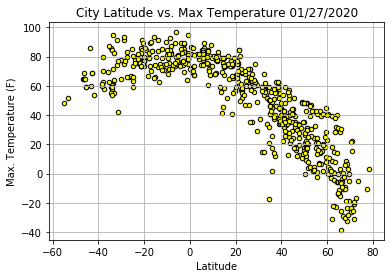

In [266]:
# Build a scatter plot for each data type
plt.scatter(weather_pd["Lat"], weather_pd["Max Temp"], marker="o", color="yellow", edgecolors= "black", s=20)

# Setting title, labels, grid
plt.title("City Latitude vs. Max Temperature 01/27/2020")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

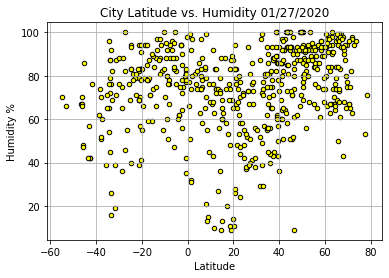

In [267]:
# Build a scatter plot for each data type
plt.scatter(weather_pd["Lat"], weather_pd["Humidity"], marker="o", color="yellow", edgecolors= "black", s=20)

# Setting title, labels, grid
plt.title("City Latitude vs. Humidity 01/27/2020")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

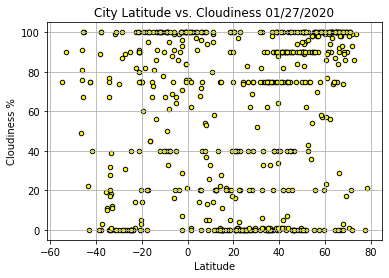

In [268]:
# Build a scatter plot for each data type
plt.scatter(weather_pd["Lat"], weather_pd["Cloudiness"], marker="o", color="yellow", edgecolors= "black", s=20)

# Setting title, labels, grid
plt.title("City Latitude vs. Cloudiness 01/27/2020")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

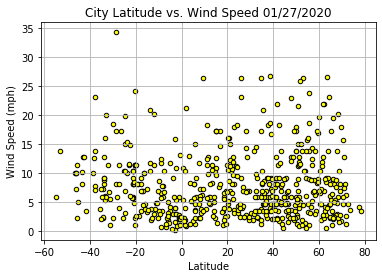

In [269]:
# Build a scatter plot for each data type
plt.scatter(weather_pd["Lat"], weather_pd["Wind Speed"], marker="o", color="yellow", edgecolors= "black", s=20)

# Setting title, labels, grid
plt.title("City Latitude vs. Wind Speed 01/27/2020")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

## Linear Regression

In [270]:
# OPTIONAL: Create a function to create Linear Regression plots

In [271]:
# Create Northern and Southern Hemisphere DataFrames

# Create Hemisphere list
Hemisphere_List = []

# for statement to determine hemisphere based on each city's lat, determination gets added to the list previosuly defined
for Lat in weather_pd["Lat"]:
    if Lat > 0:
        Hemisphere_List.append("Northern")
    elif Lat < 0:
        Hemisphere_List.append("Southern")
    else:
        Hemisphere_List.append("Equator")

# Adding Hemisphere column to existing dataframe        
weather_pd['Hemisphere'] = Hemisphere_List

# Displaying revised dataframe
weather_pd.head()

,City,Cloudiness,Country,DateTime,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,Ushuaia,75,AR,2020-01-27 02:21:31,70,-54.80,-68.30,48.20,5.82,Southern
1,Yerbogachen,90,RU,2020-01-27 02:21:32,91,61.28,108.01,2.48,11.90,Northern
2,Hobart,75,AU,2020-01-27 02:20:17,42,-42.88,147.33,69.01,12.75,Southern
3,Port Alfred,18,ZA,2020-01-27 02:21:34,76,-33.59,26.89,62.01,5.99,Southern
4,Yellowknife,90,CA,2020-01-27 02:21:35,84,62.46,-114.35,1.40,6.93,Northern


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8781480366833738


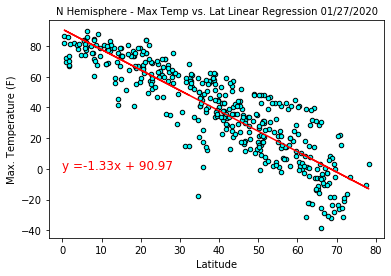

In [272]:
# DataFrame to filter only the Northern Hemisphere
Northern = weather_pd[(weather_pd["Hemisphere"] == "Northern")]

# Linear Regression for the Northern Hemisphere - Max Temp vs. Latitude
x_values = Northern["Lat"]
y_values = Northern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color="cyan", edgecolors= "black", s=20)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=12,color="red")

# Setting title, labels
plt.title("N Hemisphere - Max Temp vs. Lat Linear Regression 01/27/2020", fontsize=10)
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Northern_Hemisphere_Temp_v_Latitude_Linear_Regression.png")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue}")

#print scatter plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5102368677259631


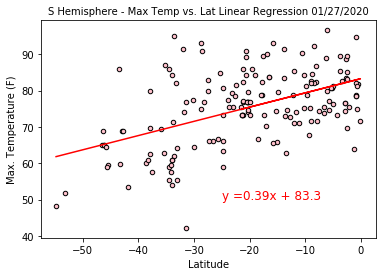

In [273]:
#DataFrame to filter only the Southern Hemisphere
Southern = weather_pd[(weather_pd["Hemisphere"] == "Southern")]

#Linear Regression for the Southern Hemisphere - Max Temp vs. Latitude
x_values = Southern["Lat"]
y_values = Southern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color="pink", edgecolors= "black", s=20)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=12,color="red")

# Setting title, labels
plt.title("S Hemisphere - Max Temp vs. Lat Linear Regression 01/27/2020", fontsize=10)
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Southern_Hemisphere_Temp_v_Latitude_Linear_Regression.png")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue}")

#print scatter plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3915900751075596


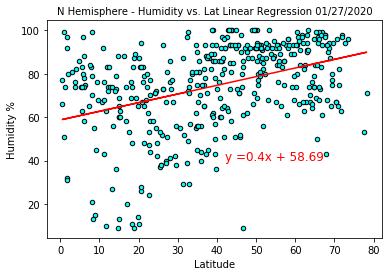

In [274]:
#Linear Regression for the Northern Hemisphere - Humidity (%) vs. Latitude
x_values = Northern["Lat"]
y_values = Northern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color="cyan", edgecolors= "black", s=20)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42,40),fontsize=12,color="red")

# Setting title, labels
plt.title("N Hemisphere - Humidity vs. Lat Linear Regression 01/27/2020", fontsize=10)
plt.ylabel("Humidity %")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Northern_Hemisphere_Humidity_v_Latitude_Linear_Regression.png")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue}")

#print scatter plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3446387203663182


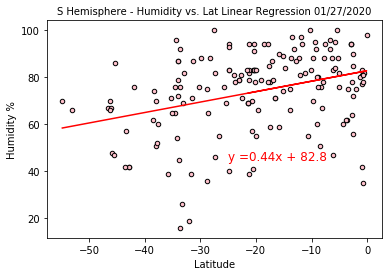

In [275]:
#Linear Regression for the Southern Hemisphere - Humidity (%) vs. Latitude
x_values = Southern["Lat"]
y_values = Southern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color="pink", edgecolors= "black", s=20)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,45),fontsize=12,color="red")

# Setting title, labels
plt.title("S Hemisphere - Humidity vs. Lat Linear Regression 01/27/2020", fontsize=10)
plt.ylabel("Humidity %")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Southern_Hemisphere_Humidity_v_Latitude_Linear_Regression.png")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue}")

#print scatter plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3394066339133813


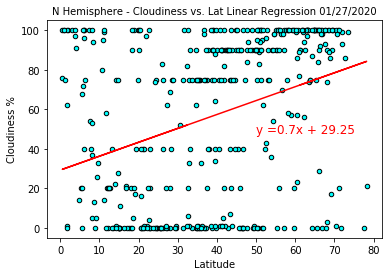

In [276]:
#Linear Regression for the Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = Northern["Lat"]
y_values = Northern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color="cyan", edgecolors= "black", s=20)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,48),fontsize=12,color="red")

# Setting title, labels
plt.title("N Hemisphere - Cloudiness vs. Lat Linear Regression 01/27/2020", fontsize=10)
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Northern_Hemisphere_Cloudiness_v_Latitude_Linear_Regression.png")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue}")

#print scatter plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.28834633018187267


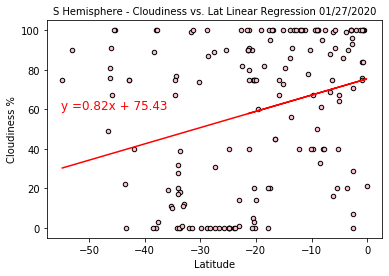

In [277]:
#Linear Regression for the Southern Hemisphere - Cloudiness (%) vs. Latitude
x_values = Southern["Lat"]
y_values = Southern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color="pink", edgecolors= "black", s=20)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=12,color="red")
# Setting title, labels
plt.title("S Hemisphere - Cloudiness vs. Lat Linear Regression 01/27/2020", fontsize=10)
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Southern_Hemisphere_Cloudiness_v_Latitude_Linear_Regression.png")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue}")

#print scatter plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03196116224636766


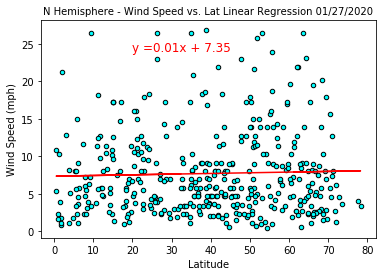

In [278]:
#Linear Regression for the Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = Northern["Lat"]
y_values = Northern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color="cyan", edgecolors= "black", s=20)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,24),fontsize=12,color="red")

# Setting title, labels
plt.title("N Hemisphere - Wind Speed vs. Lat Linear Regression 01/27/2020", fontsize=10)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Northern_Hemisphere_Wind_Speed_v_Latitude_Linear_Regression.png")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue}")

#print scatter plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3240864552678662


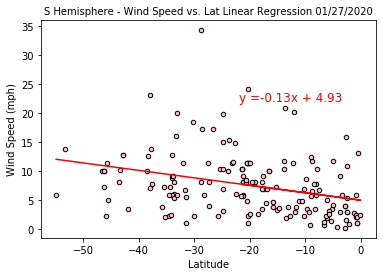

In [279]:
#Linear Regression for the Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = Southern["Lat"]
y_values = Southern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color="pink", edgecolors= "black", s=20)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-22,22),fontsize=12,color="red")

# Setting title, labels
plt.title("S Hemisphere - Wind Speed vs. Lat Linear Regression 01/27/2020", fontsize=10)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Southern_Hemisphere_Wind_Speed_v_Latitude_Linear_Regression.png")


# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue}")

#print scatter plot
plt.show()